Avocado has become one of the world's trendiest foods. As the poster child of millennial healthy eating, this superfood is now a mainstay for foodies everywhere. But have you noticed your avo on toast is costing more and more? Avocado prices have rocketed in recent years by up to 129%, with the average national price of a single Hass avocado reaching $2.10 in 2019, almost doubling in just one year. The average American eats 7 pounds of guacamole a year, up from 1.1 pounds in 1989, according to Agriculture Marketing Resource Center, a research group that receives grants from the USDA. by Patrick Gillespie  CNNMoney, Sep 11 2017.

The ancient Chinese philosopher Lao Tzu once said: “The journey of a thousand miles begins with one step.”

Feb 07, 2021 \
Assignment:
    
AVOCADO PRICES

Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU(Product Lookup codes) sold, (Small Hass)\
4225 - Total number of avocados with PLU 4225 sold, (Large Hass)\
4770 - Total number of avocados with PLU 4770 sold, (XLarge Hass)

Interesting info about difference between avocado and Hass avocado:
    The big difference: these avocados have significantly less fat. 
    Now, less fat might sound good, but the fats found in Hass avocados are very healthy. 
    Avocado oils are considered heart-healthy and good for your skin. ... 
    The richness of the fruit makes the Hass easy to mash and whip and richer in taste.

In which cities can millenials have their avocado toast AND buy a home?

Was the Avocadopocalypse of 2017 real?
The aim of this project is to answer the following four questions:
    
1. Which region are the lowest and highest prices of Avocado?
2. What is the highest region of avocado production?
3. What is the average avocado prices in each year?
4. What is the average avocado volume in each year?

Hypotesis: Hypotetically, Millenials will be able to afford avocado?

In [1]:
import warnings
# Data manipulation
import pandas as pd
from scipy import stats
import numpy as np
import statsmodels.api as sm

warnings.filterwarnings("ignore")

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
from sklearn.pipeline import Pipeline
# Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
import xgboost as xgb
import statsmodels.api as sm

In [4]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, accuracy_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import roc_auc_score

In [ ]:
Data = pd.read_csv('avocado.csv')

In [ ]:
Data.head()

In [7]:
Data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [8]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


Data pre-processing: Cleaning,conversion of some features

In [9]:
#drop Unnamed:0 column
Data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [10]:
#Convert  Date object to date format
Data['Date'] = pd.to_datetime(Data["Date"])

In [11]:
Data['year'] = pd.to_numeric(Data['year'],downcast='float')

In [12]:
Data['month'] = pd.DatetimeIndex(Data['Date']).month.astype('float')

In [13]:
Data['day'] = pd.DatetimeIndex(Data['Date']).day.astype('int32')

In [14]:
Data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,12.0,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,12.0,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,12.0,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,12.0,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,11.0,29


In [15]:
label_type = LabelEncoder()
label = label_type.fit_transform(Data['type'])
df = Data.drop('type',axis="columns")
df['Type'] = label

In [16]:
df.rename(columns={'Total Volume':'TotalVolumeSold','Total Bags':'TotalBags'},inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             18249 non-null  datetime64[ns]
 1   AveragePrice     18249 non-null  float64       
 2   TotalVolumeSold  18249 non-null  float64       
 3   4046             18249 non-null  float64       
 4   4225             18249 non-null  float64       
 5   4770             18249 non-null  float64       
 6   TotalBags        18249 non-null  float64       
 7   Small Bags       18249 non-null  float64       
 8   Large Bags       18249 non-null  float64       
 9   XLarge Bags      18249 non-null  float64       
 10  year             18249 non-null  float32       
 11  region           18249 non-null  object        
 12  month            18249 non-null  float64       
 13  day              18249 non-null  int64         
 14  Type             18249 non-null  int32

#### Explanatory Data Analysis(EDA)

In [18]:
#Regions with the highest avocado sale

region_grouped = df.groupby('region')['TotalVolumeSold'].agg(sum)
vol_reg=region_grouped.sort_values(ascending=False).head(20)
#regions = vol_reg.drop(['TotalUS'])

reg_sort = vol_reg.sort_values(ascending=False).head(20)

region_vol_sorted=pd.DataFrame(reg_sort)
region_vol_sorted

,TotalVolumeSold
region,
TotalUS,5.864740e+09
West,1.086779e+09
California,1.028982e+09
SouthCentral,1.011280e+09
Northeast,7.132809e+08
Southeast,6.152384e+08
GreatLakes,5.896425e+08
Midsouth,5.083494e+08
LosAngeles,5.078965e+08


In [19]:
#Regions with the highest total bags sale

region_totbags = df.groupby('region')['TotalBags'].agg(sum)
vol_reg=region_totbags.sort_values(ascending=False).head(20)
#regions = vol_reg.drop(['TotalUS'])

reg_sort = vol_reg.sort_values(ascending=False).head(20)

region_vol_sorted=pd.DataFrame(reg_sort)
region_vol_sorted

,TotalBags
region,
TotalUS,1.638601e+09
West,3.670736e+08
California,2.466822e+08
SouthCentral,2.333924e+08
Northeast,1.969884e+08
Southeast,1.815276e+08
GreatLakes,1.785756e+08
LosAngeles,1.682645e+08
Midsouth,1.565136e+08


In [20]:
# Check which regions have the lowest and highest prices of avocado?

reg_price = df.groupby(["region"])["AveragePrice"].agg([min,max])
reg_price.head(20)

,min,max
region,,
Albany,0.85,2.13
Atlanta,0.62,2.75
BaltimoreWashington,0.95,2.28
Boise,0.58,2.79
Boston,0.85,2.19
BuffaloRochester,1.03,2.57
California,0.67,2.58
Charlotte,0.80,2.83
Chicago,0.70,2.30


In [21]:
print(reg_price['min'].sort_values(ascending=True).head(10),
      reg_price['max'].sort_values(ascending=False).head(10))

region
CincinnatiDayton    0.44
PhoenixTucson       0.46
Detroit             0.48
Nashville           0.51
Houston             0.51
Columbus            0.52
WestTexNewMexico    0.52
LosAngeles          0.53
LasVegas            0.54
Jacksonville        0.54
Name: min, dtype: float64 region
SanFrancisco         3.25
Tampa                3.17
MiamiFtLauderdale    3.05
RaleighGreensboro    3.04
LasVegas             3.03
Jacksonville         2.99
Seattle              2.96
Spokane              2.95
WestTexNewMexico     2.93
Orlando              2.87
Name: max, dtype: float64


In [22]:
# Check which year has the lowest, highest, and average prices of avocado?

df.groupby(["year","Type"])["AveragePrice"].agg([min,max,np.mean,np.median])

min   max      mean  median
year   Type                              
2015.0 0     0.49  1.59  1.077963    1.08
       1     0.81  2.79  1.673324    1.67
2016.0 0     0.51  2.20  1.105595    1.08
       1     0.58  3.25  1.571684    1.53
2017.0 0     0.46  2.22  1.294888    1.30
       1     0.44  3.17  1.735521    1.72
2018.0 0     0.56  1.74  1.127886    1.14
       1     1.01  2.30  1.567176    1.55

In [23]:
df.groupby('year')['AveragePrice'].agg(['mean', 'median', 'std', 'var'])

,mean,median,std,var
year,,,,
2015.0,1.375590,1.300,0.375595,0.141071
2016.0,1.338640,1.300,0.393708,0.155006
2017.0,1.515128,1.490,0.432906,0.187407
2018.0,1.347531,1.345,0.305858,0.093549


In [24]:
#Average sale per region per year
pivot_region = pd.pivot_table(df, index='region',columns='year',values='TotalVolumeSold',aggfunc='mean')
pivot_region.head(7)

year,2015.0,2016.0,2017.0,2018.0
region,,,,
Albany,3.874900e+04,5.061861e+04,4.935455e+04,6.424942e+04
Atlanta,2.233817e+05,2.723738e+05,2.718408e+05,3.429759e+05
BaltimoreWashington,3.908229e+05,3.932096e+05,3.869399e+05,5.066210e+05
Boise,3.638805e+04,4.474528e+04,4.491096e+04,5.061498e+04
Boston,2.639903e+05,2.939550e+05,2.887799e+05,3.598752e+05
BuffaloRochester,5.666572e+04,6.927992e+04,7.302175e+04,8.849242e+04
California,2.898148e+06,3.136427e+06,2.996646e+06,3.489221e+06


In [25]:
#Minimum prices per region 2015-2018
pivot_region = pd.pivot_table(df, index='region',columns='year',values='AveragePrice',aggfunc='min')
pivot_region.head(7)

year,2015.0,2016.0,2017.0,2018.0
region,,,,
Albany,0.93,0.85,1.13,1.03
Atlanta,0.93,0.68,0.62,0.86
BaltimoreWashington,0.99,0.95,1.09,1.12
Boise,0.71,0.58,0.72,1.03
Boston,0.94,0.85,1.09,1.12
BuffaloRochester,1.23,1.04,1.13,1.03
California,0.78,0.70,0.67,0.80


In [26]:
#Max prices per region 2015-2018
pivot_region = pd.pivot_table(df, index='region',columns='year',values='AveragePrice',aggfunc='max')
pivot_region.head(7)

year,2015.0,2016.0,2017.0,2018.0
region,,,,
Albany,2.09,2.00,2.13,1.71
Atlanta,2.04,2.29,2.75,1.67
BaltimoreWashington,1.81,2.28,2.26,1.66
Boise,2.35,2.24,2.79,1.85
Boston,2.19,2.00,2.17,1.92
BuffaloRochester,2.02,2.13,2.57,1.38
California,2.07,2.58,2.54,1.97


## Data analysis using Time Series 

Box-Jenkins 1976 Methodology\
Seasonal Autoregressive Integrated Moving Average, SARIMA or Seasonal ARIMA

In [27]:

df_price = df[['Date','AveragePrice']]
df_price.index

RangeIndex(start=0, stop=18249, step=1)

In [28]:
df_price.head()

,Date,AveragePrice
0,2015-12-27,1.33
1,2015-12-20,1.35
2,2015-12-13,0.93
3,2015-12-06,1.08
4,2015-11-29,1.28


In [29]:
#Indexing with Time Series Data. Set new index as DatetimeIndex

df_price = df_price.set_index('Date')

In [30]:
df_price.head()

,AveragePrice
Date,
2015-12-27,1.33
2015-12-20,1.35
2015-12-13,0.93
2015-12-06,1.08
2015-11-29,1.28


Data sorted by monthly start

In [31]:
# ts_ms : resampling with monthly start(MS) and summarize all prices. Months contribute more to seasonal sales behavior.
ts_ms = df_price['AveragePrice'].resample('MS').sum()  

In [32]:
ts_ms.head()

Date
2015-01-01    589.70
2015-02-01    573.24
2015-03-01    735.47
2015-04-01    597.65
2015-05-01    726.13
Freq: MS, Name: AveragePrice, dtype: float64

In [33]:
len(ts_ms)

39

<AxesSubplot:xlabel='Date'>

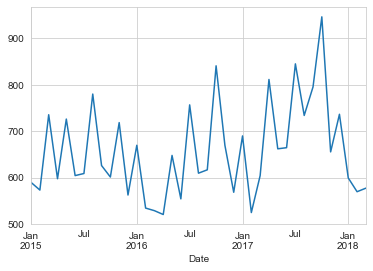

In [34]:
# Data distribution of average price. There is a trend in our data.
# THE PREDICTIONS OF ARIMA MODEL ARE NOT GOING TO BE GOOD BECAUSE OUR DATA IS SEASONAL
ts_ms.plot()

First, we need to check if a series is stationary or not.

ADF (Augmented Dickey-Fuller) Test

The Dickey-Fuller test is one of the most popular statistical tests. It can be used to determine the presence of unit root in the series, and hence help us understand if the series is stationary or not. The null and alternate hypothesis of this test is:

- Null Hypothesis(𝐻0): The series has a unit root. Series is non-stationary.
- Alternate Hypothesis: The series has no unit root. Series is stationary.\
If we fail to reject the null hypothesis, we can say that the series is non-stationary. This means that the series can be linear or difference stationary (we will understand more about difference stationary in the next section).
If both mean and standard deviation are flat lines(constant mean and constant variance), the series becomes stationary.\
If the p-value is very low (i.e.: lower than a specified significance level), this tells us that  𝐻0  may not be sufficient to explain the data that we have. 
This allows us to reject the null hypothesis and accept the alternative hypothesis.

In [35]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
       
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        
    print(dfoutput)

In [36]:
test_stationarity(ts_ms)

Results of Dickey-Fuller Test:
Test Statistic                 -2.683439
p-value                         0.076948
#Lags Used                      6.000000
Number of Observations Used    32.000000
Critical Value (1%)            -3.653520
Critical Value (5%)            -2.957219
Critical Value (10%)           -2.617588
dtype: float64


For time series forecasting, a series needs to be stationary. The series should have a constant mean, variance, and covariance. In order to perform a time series analysis, we may need to separate seasonality and trend from our series. The resultant series will become stationary through this process.

So let us separate Trend and Seasonality from the time series.

In [37]:
#Take diff by 1

In [38]:
#This operation would reduce trend, period is 1 month
ts_diff1 = ts_ms.diff(periods=1).dropna()

<AxesSubplot:xlabel='Date'>

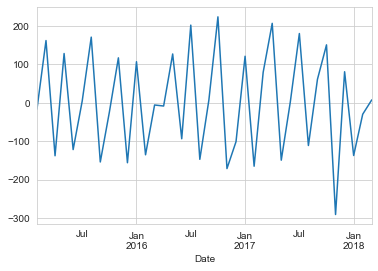

In [39]:
ts_diff1.plot()

In [40]:
##This operation would reduce trend, period is 12 since our data set for 12 months
ts_diff12 = ts_ms.diff(periods=12)

<AxesSubplot:xlabel='Date'>

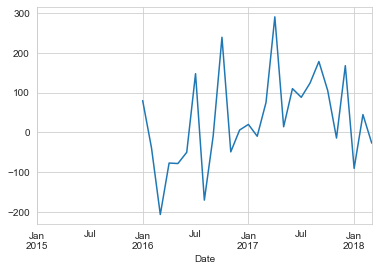

In [41]:
ts_diff12.plot()

In [42]:
#Take log of whole dataset ts_ms(timeseries sorted monthly) to reduce trend and increase stationarity.
ts_log = np.log(ts_ms)

<AxesSubplot:xlabel='Date'>

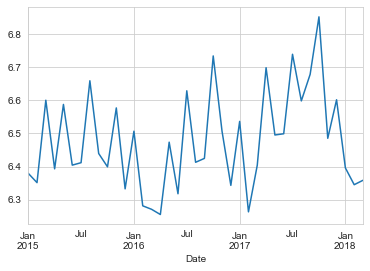

In [43]:
ts_log.plot()

In [44]:
test_stationarity(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                 -2.789319
p-value                         0.059816
#Lags Used                      6.000000
Number of Observations Used    32.000000
Critical Value (1%)            -3.653520
Critical Value (5%)            -2.957219
Critical Value (10%)           -2.617588
dtype: float64


Box-Jenkins 1976 Methodology\
What is SARIMA?\
Seasonal Autoregressive Integrated Moving Average, SARIMA or Seasonal ARIMA, is an extension of ARIMA that explicitly supports univariate time series data with a seasonal component.\
An autoregressive integrated moving average, or ARIMA, is a statistical analysis model that uses time series data to either better understand the data set or to predict future trends.\
It adds three new hyperparameters to specify the autoregression (AR), differencing (I) and moving average (MA) for the seasonal component of the series, as well as an additional parameter for the period of the seasonality.

Trend Elements There are three trend elements that require configuration.

They are the same as the ARIMA model; specifically:

p: Trend autoregression order. d: Trend difference order. q: Trend moving average order.\
Seasonal Elements:\
There are four seasonal elements that are not part of ARIMA that must be configured; they are:\
P: Seasonal autoregressive order.\
D: Seasonal difference order.\
Q: Seasonal moving average order.\
m: The number of time steps for a single seasonal period.

In [45]:
#Identifying optimal p,d,q and P of SARIMA model: Grid Search for hyperparameters
import itertools

In [46]:
p=range(0,6)
d=range(0,6)
q=range(0,4)
P=range(0,3)
D=range(0,3)
Q=range(1,2)
m=range(12,13)

In [47]:
pdq_params = list(itertools.product(p,d,q))
PDQ_params = list(itertools.product(P,D,Q,m))

In [48]:
PDQ_params

[(0, 0, 1, 12),
 (0, 1, 1, 12),
 (0, 2, 1, 12),
 (1, 0, 1, 12),
 (1, 1, 1, 12),
 (1, 2, 1, 12),
 (2, 0, 1, 12),
 (2, 1, 1, 12),
 (2, 2, 1, 12)]

In [ ]:
rmse=[]
set1=[]
set2=[]

In [ ]:
for pdq in pdq_params:
    for PDQ in PDQ_params:
        try:
            model=SARIMAX(train, order=pdq, seasonal_order=PDQ, enforce_stationarity=False, 
                          enforce_invertibility=False).fit()
            pred_log=model.predict(start=len(train), end=(len(ts_ms)-1), typ='levels')
            pred=np.exp(pred_log)  # converting ts log values back to normanl
            err=np.sqrt(mean_squared_error(test,pred))  #calculating RMSE
            set1.append(pdq)
            set2.append(PDQ)
            rmse.append(err)
            
        except:
            continue

In [51]:
params_result = pd.DataFrame(data=rmse, index=[set1,set2], columns=['RMSE'])

In [52]:
params_result

,,RMSE


In [53]:
params_result.to_csv('SARIMA_result.csv')

In [54]:
sar1 = pd.read_csv('SARIMA_result.csv')

In [55]:
sar1.sort_values(by='RMSE', ascending=True).head()

,Unnamed: 0,Unnamed: 1,RMSE


In [56]:
#end of sarima params p,d,q optimization 

In [57]:
#SARIMAX Modeling:

In [58]:
len(ts_log)

39

In [59]:
#Spliting traing and test data. Train data are log data and test data has real values.
train=ts_log[:25]
test=ts_ms[25:]

In [60]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
#create model using SARIMAX with train data and (p, d, q), (P, D, Q, m) parameters

model_sarima = sm.tsa.statespace.SARIMAX(train, order=(4,2,1), seasonal_order=(0,1,1,12),enforce_stationarity=False,
                                        enforce_invertibility=False)
result=model_sarima.fit()

In [61]:
len(train), len(ts_ms)-1

(25, 38)

In [62]:
pred = result.predict(start=len(train), end=(len(ts_ms)-1))

In [63]:
#these are log valuse of the price
pred.head()

2017-02-01    6.048036
2017-03-01    6.395386
2017-04-01    6.399896
2017-05-01    6.419712
2017-06-01    6.503078
Freq: MS, Name: predicted_mean, dtype: float64

In [64]:
prediction = np.exp(pred)
prediction

2017-02-01    423.280712
2017-03-01    599.074396
2017-04-01    601.782501
2017-05-01    613.826449
2017-06-01    667.191964
2017-07-01    766.754485
2017-08-01    570.288208
2017-09-01    760.057214
2017-10-01    876.032478
2017-11-01    717.247565
2017-12-01    716.168329
2018-01-01    695.147781
2018-02-01    473.124699
2018-03-01    741.173365
Freq: MS, Name: predicted_mean, dtype: float64

In [65]:
#check the RMSE, error
error = np.sqrt(mean_squared_error(test,prediction))
error

101.86586120007858

In [66]:
#comparing RMSE to mean and standard deviation of test data:
test.mean(), np.sqrt(test.var())

(694.7221428571427, 121.52350498683666)

<AxesSubplot:xlabel='Date'>

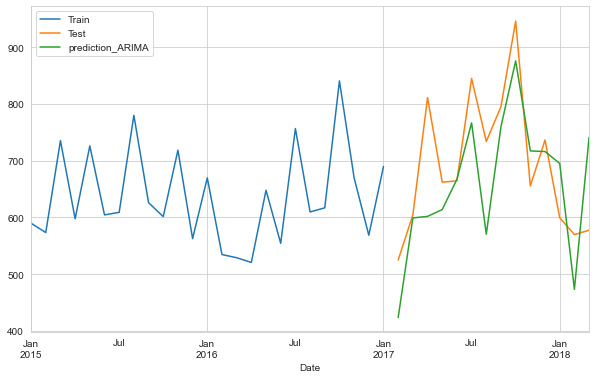

In [67]:
#Check the model :
ts_ms[:25].plot(legend=True, label='Train', figsize=(10,6))
test.plot(legend=True, label='Test')
prediction.plot(legend=True, label='prediction_ARIMA')

Predict future forecast

In [68]:
#predict future forecast using whole ts_log dataset
final_sarima = sm.tsa.statespace.SARIMAX(ts_log, order=(4,2,1), seasonal_order=(1,1,1,12),enforce_stationarity=False,
                                        enforce_invertibility=False)
final_result=final_sarima.fit()

In [69]:
pred1 = final_result.predict(start=38, end=52)

In [70]:
final_prediction=np.exp(pred1)

<AxesSubplot:xlabel='Date'>

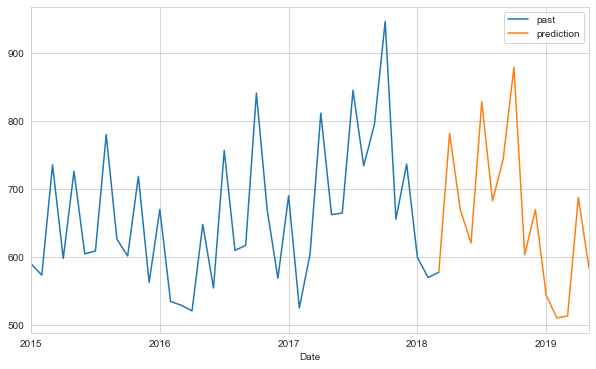

In [71]:
ts_ms.plot(legend=True, label='past', figsize=(10,6))
final_prediction.plot(legend=True, label='prediction')

In [72]:
#### EDA

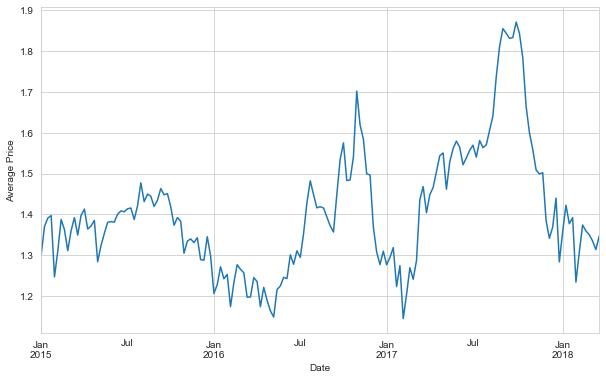

In [73]:
# Graph shows average price has some periodical or seasonal nature
plt.figure(figsize=(10,6))
gr_dt=df.groupby(by='Date')
gr_dt['AveragePrice'].mean().plot()
plt.ylabel('Average Price')
plt.show()

Quaters three and four (July-December) tend to have higher prices, on average.

In [74]:
gr_month = df.groupby(['month','year'])['AveragePrice'].agg('mean')
gr_month

month  year  
1.0    2015.0    1.365046
       2016.0    1.240185
       2017.0    1.277500
       2018.0    1.387431
2.0    2015.0    1.326944
       2016.0    1.237106
       2017.0    1.214792
       2018.0    1.318704
3.0    2015.0    1.361981
       2016.0    1.224213
       2017.0    1.398935
       2018.0    1.336458
4.0    2015.0    1.383449
       2016.0    1.205023
       2017.0    1.502611
5.0    2015.0    1.344685
       2016.0    1.199722
       2017.0    1.532593
6.0    2015.0    1.399074
       2016.0    1.283056
       2017.0    1.545395
7.0    2015.0    1.409444
       2016.0    1.401333
       2017.0    1.564926
8.0    2015.0    1.444481
       2016.0    1.411111
       2017.0    1.698958
9.0    2015.0    1.449144
       2016.0    1.427870
       2017.0    1.840949
10.0   2015.0    1.391968
       2016.0    1.557093
       2017.0    1.752444
11.0   2015.0    1.330611
       2016.0    1.550023
       2017.0    1.517292
12.0   2015.0    1.305244
       2016.0    1.31599

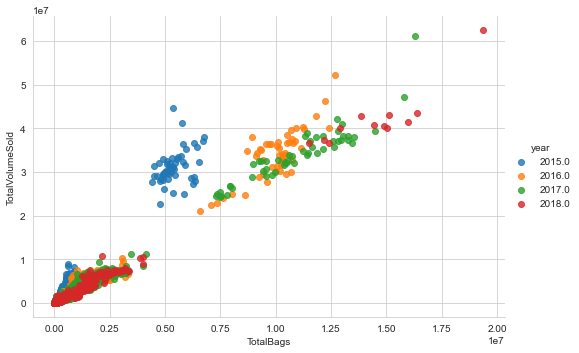

In [75]:
#TotalVolumeSold and TotalBags have good correlation 
sns.lmplot(data=df,x='TotalBags',y='TotalVolumeSold', hue='year',fit_reg=False, height=5, aspect=1.4)

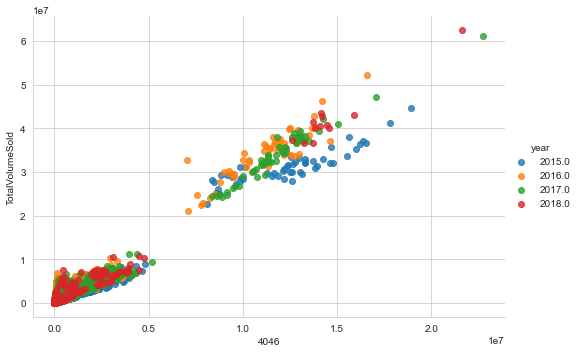

In [76]:
sns.lmplot(data=df,x='4046',y='TotalVolumeSold', hue='year',fit_reg=False, height = 5, aspect=1.4)

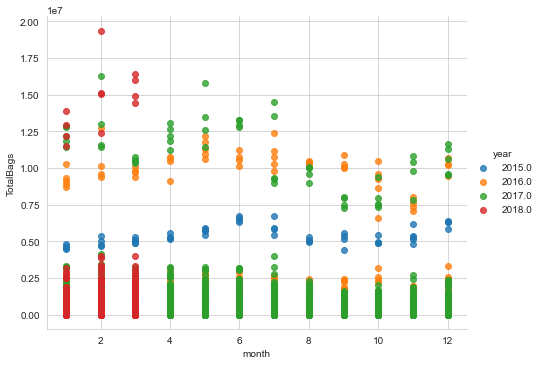

In [77]:
sns.lmplot(data=df,x='month',y='TotalBags', hue='year',fit_reg=False, height = 5, aspect = 1.3)

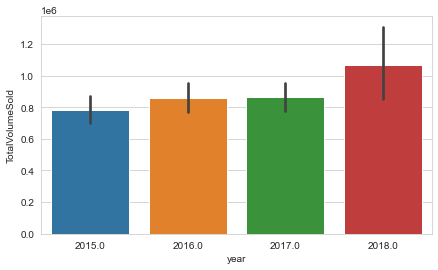

In [78]:
fig = plt.figure(figsize=(7, 4))

sns.barplot(x='year',y='TotalVolumeSold', data=df)
plt.show()

In [79]:
df.columns

Index(['Date', 'AveragePrice', 'TotalVolumeSold', '4046', '4225', '4770',
       'TotalBags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year',
       'region', 'month', 'day', 'Type'],
      dtype='object')

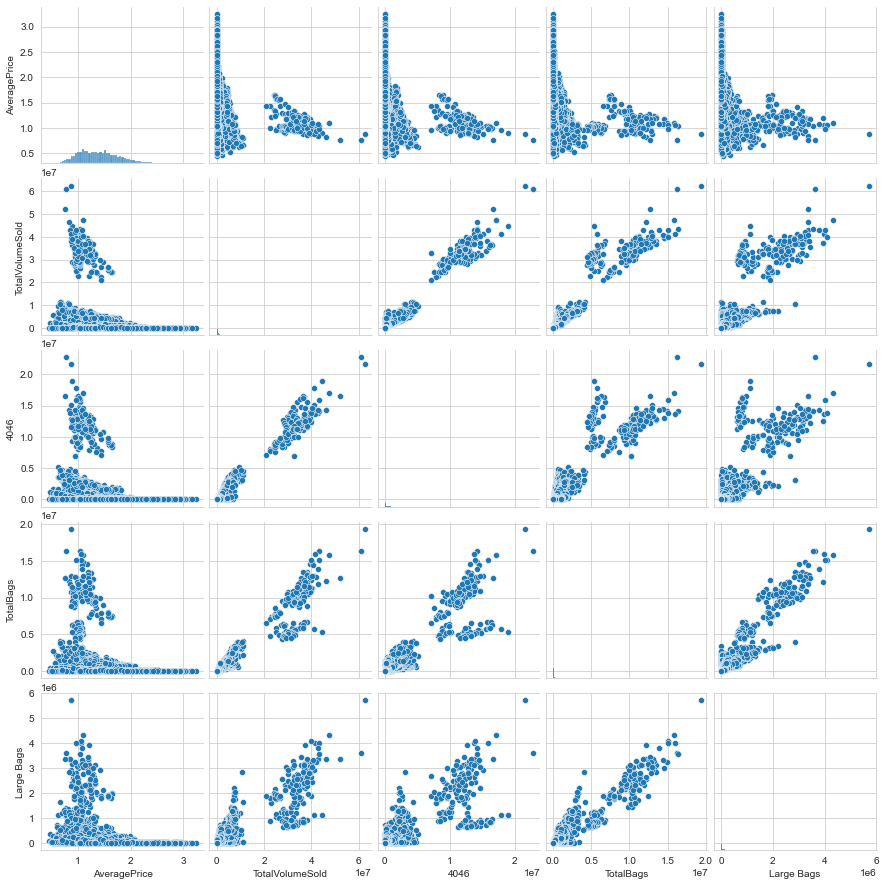

In [80]:
sns.pairplot(df[['AveragePrice', 'TotalVolumeSold', '4046', 'TotalBags', 'Large Bags']])

<AxesSubplot:xlabel='month', ylabel='Density'>

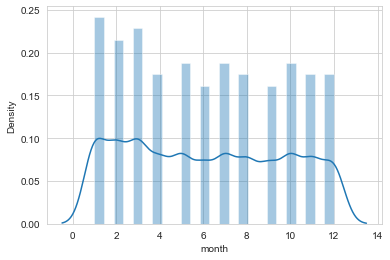

In [81]:
sns.distplot(a=df.month)

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

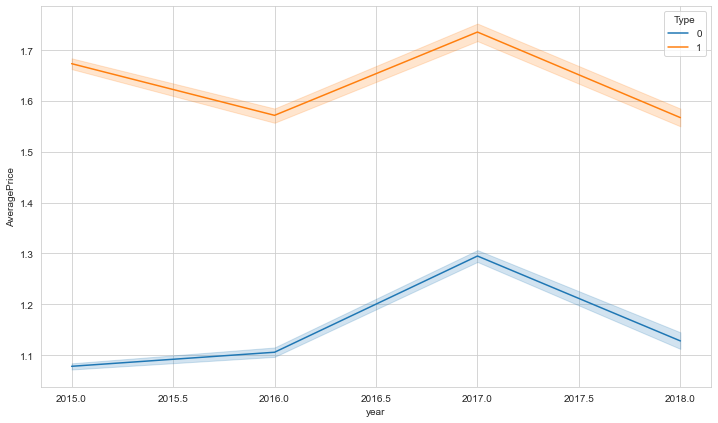

In [82]:
plt.figure(figsize=(12,7))

sns.lineplot(x='year', y='AveragePrice', hue='Type', data=df)

In [177]:
# This boxplot graf presents avocado avarege price per year.(2018 has only data for the first quater.) 
sns.boxplot(x="year", y="AveragePrice", data=df)

ValueError: Could not interpret input 'year'

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

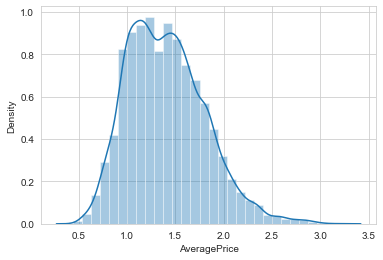

In [84]:
sns.distplot(a=df['AveragePrice'], bins=30)
#Average Price has been distibuted almost normal

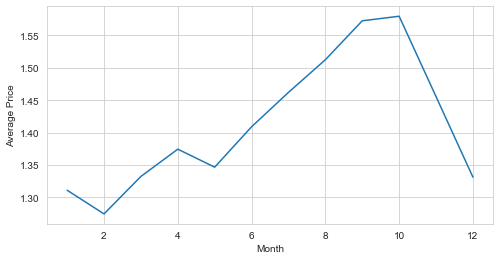

In [85]:
#It seems that season can affect prices:

plt.figure(figsize=(8,4))
x=df.groupby('month')['AveragePrice'].mean()

plt.plot(x)

plt.xlabel('Month')
plt.ylabel('Average Price')

plt.show()

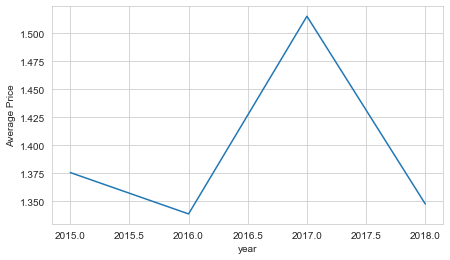

In [86]:
plt.figure(figsize=(7,4))
x=df.groupby('year')['AveragePrice'].mean()

plt.plot(x)

plt.xlabel('year')
plt.ylabel('Average Price')

plt.show()

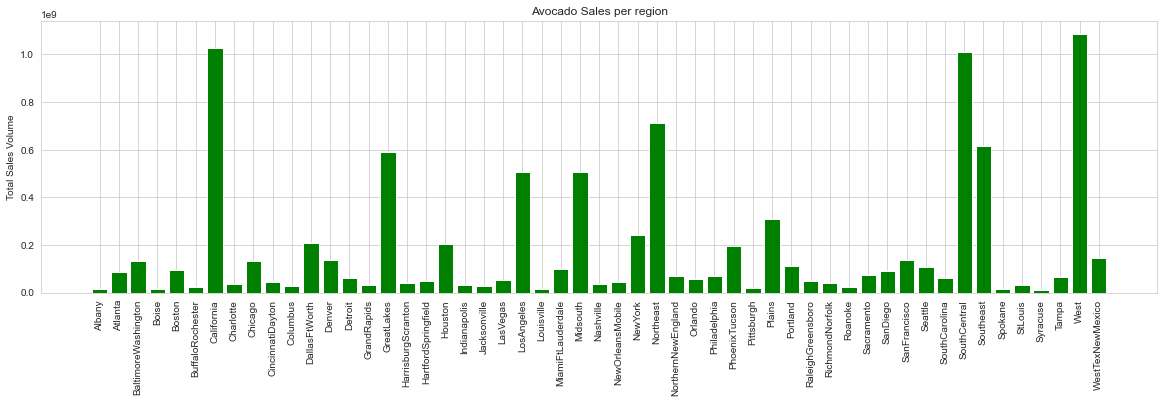

In [87]:
#Avocado Sales per region
us_regions = df['region'].unique()
us_regions = np.delete(us_regions,-3) #last 3 deleted regions are 'TotalUS', 'West', 'WestTexNewMexico'

region_total_sales = df.groupby('region')['TotalVolumeSold'].agg(sum)
region_total_sales=region_total_sales.drop('TotalUS')

plt.figure(figsize = (20,5))
plt.bar(us_regions, region_total_sales, color='green')  #x=us_regions, y=region_total_sales

plt.title('Avocado Sales per region')
plt.ylabel('Total Sales Volume')
plt.xticks(rotation=90)
plt.show()

In [88]:
Data['year'].value_counts()

2017.0    5722
2016.0    5616
2015.0    5615
2018.0    1296
Name: year, dtype: int64

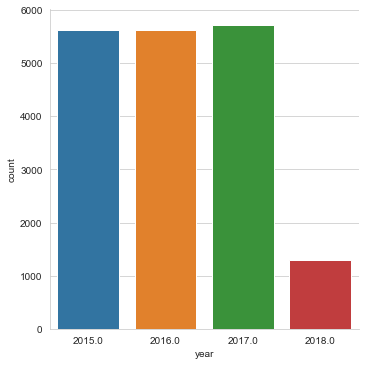

In [89]:
sns.catplot(data=df,x='year', kind='count')

### Features, Correlation

In [90]:
# Correlation between average price and feature is not noticable, which is not good.
# Futher analysis will show if some models will give good results.
df.corr()

,AveragePrice,TotalVolumeSold,4046,4225,4770,TotalBags,Small Bags,Large Bags,XLarge Bags,year,month,day,Type
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.162409,0.027386,0.615845
TotalVolumeSold,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.024689,-0.009747,-0.232434
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.025803,-0.010159,-0.225819
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.022108,-0.012393,-0.232289
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.033424,-0.009009,-0.210027
TotalBags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.022724,-0.004988,-0.217788
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.023126,-0.003870,-0.220535
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.020187,-0.008352,-0.193177
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.012969,0.000319,-0.175483
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.177050,0.004475,-0.000032


In [91]:
corr_df = df.corr()

In [92]:
corr_df.AveragePrice.sort_values(ascending=False)

AveragePrice       1.000000
Type               0.615845
month              0.162409
year               0.093197
day                0.027386
XLarge Bags       -0.117592
4225              -0.172928
Large Bags        -0.172940
Small Bags        -0.174730
TotalBags         -0.177088
4770              -0.179446
TotalVolumeSold   -0.192752
4046              -0.208317
Name: AveragePrice, dtype: float64

Droping features which bring some redundancy in dataset

In [93]:
df_feats = df.copy()

In [94]:
df_feats.rename(columns={'4046':'small_Hass'},inplace=True)

In [95]:
df_feats.head()

,Date,AveragePrice,TotalVolumeSold,small_Hass,4225,4770,TotalBags,Small Bags,Large Bags,XLarge Bags,year,region,month,day,Type
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015.0,Albany,12.0,27,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015.0,Albany,12.0,20,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015.0,Albany,12.0,13,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015.0,Albany,12.0,6,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015.0,Albany,11.0,29,0


In [96]:
# Encoding: Create dummy variables!

In [97]:
dummies = pd.get_dummies(df_feats[['year','region','month']],drop_first=True)

df_dummies = pd.concat([df_feats[['AveragePrice', 'TotalVolumeSold', 'small_Hass', '4225', '4770', 'TotalBags',
                                  'Small Bags', 'Large Bags', 'XLarge Bags', 'Type']],dummies],axis=1)

In [179]:
np.corrcoef(df_dummies['AveragePrice'],df_dummies['TotalVolumeSold'])

array([[ 1.        , -0.19275239],
       [-0.19275239,  1.        ]])

Statistics

In [180]:
# Statsmodel
import statsmodels.formula.api as smf  # import the formula tools

model = smf.ols(data = df_feats, formula = "AveragePrice ~ TotalVolumeSold + year + month + Type")  # create the linear regression model object. 
                                                             # "ols" stands for ordinary least squares.
result = model.fit()  # create a RegressionResults object

# Result
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AveragePrice   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     3349.
Date:                Thu, 04 Mar 2021   Prob (F-statistic):               0.00
Time:                        19:07:07   Log-Likelihood:                -4270.4
No. Observations:               18249   AIC:                             8551.
Df Residuals:                   18244   BIC:                             8590.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -108.3003      4.935    -21.946      0.000    -117.973     -98.627
TotalVolumeSold -5.824e-09   6.74e-10     -8.637      0.000   -7.15e-09    -4.5e-09
year                0.0542      0.002     22.159      0.000       0.049       0.059
month               0.0209      0.001     32.140      0.000       0.020       0.022
Type                0.4866      0.005    104.536      0.000       0.478       0.496
==============================================================================
Omnibus:                      616.940   Durbin-Watson:                   0.341
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              966.329
Skew:                           0.321   Prob(JB):                    1.46e-210
Kurtosis:                       3.926   Cond. No.                     7.75e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.75e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Spliting Data, Validation

In [100]:
# making a copy of dataset to avoid going back and re-run data import
df_fin = df_dummies.copy()

In [101]:
#df_fin.info()

In [102]:
y=df_fin['AveragePrice'].values

In [103]:
stats.shapiro(y)  #determine if a given data set is Gaussian

ShapiroResult(statistic=0.9786123633384705, pvalue=2.802596928649634e-45)

In [211]:
X = df_fin.drop(['AveragePrice'],axis=1).values
X1 = df_fin.drop(['AveragePrice'],axis=1)   # when .values is removed we get DataFrame

In [178]:
print('X shape:',X.shape)
print('y shape:',y.shape)

X shape: (18249, 64)
y shape: (18249,)


In [213]:
X1.head()

,TotalVolumeSold,small_Hass,4225,4770,TotalBags,Small Bags,Large Bags,XLarge Bags,Type,year,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015.0,...,0,0,0,0,0,0,0,0,0,0
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015.0,...,0,0,0,0,0,0,0,0,0,0
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015.0,...,0,0,0,0,0,0,0,0,0,0
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015.0,...,0,0,0,0,0,0,0,0,0,0
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015.0,...,0,0,0,0,0,0,0,0,0,0


#### Features importance

In [214]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X1,y)

ExtraTreesRegressor()

In [215]:
#print first 7 largest features
feat = model.feature_importances_
feat[::-1].sort()
print(feat[:7])

[0.37926493 0.09296316 0.06957144 0.04563279 0.02822229 0.02653195
 0.0246021 ]


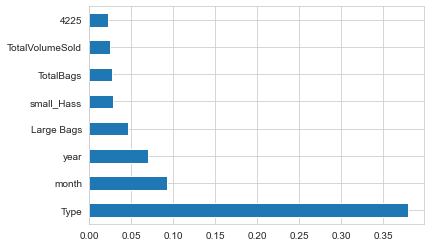

In [221]:
#plot graph of feature importance for better vizualization!!!
feat_importances = pd.Series(model.feature_importances_, index=X1.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
#Features normalization 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [109]:
X_test = sc.transform(X_test)

In [110]:
#Calculating imbalance of y_train data.
y_train.mean()

1.4048599219124598

In [111]:
y_mean = 1.4                                # decide on a threshold limit
y_train_classes = np.zeros_like(y_train)    # initialise a matrix full with zeros
y_train_classes[y_train > y_mean] = 1       # add a 1 if the threshold was breached

In [112]:
from collections import Counter
counter = Counter(y_train_classes)
print(counter)
print('AveragePrice target is balanced.')

Counter({0.0: 7764, 1.0: 6835})
AveragePrice target is balanced.


Create Pipelines for classifiers, applying the transformations and training the model.\
These are regression classifiers since our prediction target is continuous, numerical.

In [113]:
lr_pipeline = Pipeline([('lr_classifier', LinearRegression())])

In [114]:
knn_pipeline = Pipeline([('knn_regressor', KNeighborsRegressor(n_neighbors=7))])

In [115]:
dt_pipeline = Pipeline([('dt_classifier', DecisionTreeRegressor(max_depth=10))])

In [116]:
ada_pipeline = Pipeline([('ada_classifier',
                          AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10),
                                            n_estimators=100, learning_rate=1.0))])

In [117]:
rf_pipeline = Pipeline([('rf_classifier', RandomForestRegressor(n_estimators=200, min_samples_split=3,
                                                                min_samples_leaf=2))])

In [118]:
#Make a list of pipelines
pipelines = [lr_pipeline, knn_pipeline, dt_pipeline, ada_pipeline, rf_pipeline]

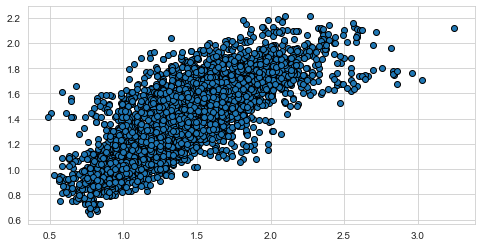

y_pred mean: 1.4079485714380904
Logistic Regression RMSE: 0.2577216211043106, R2_score: 0.586601027322109


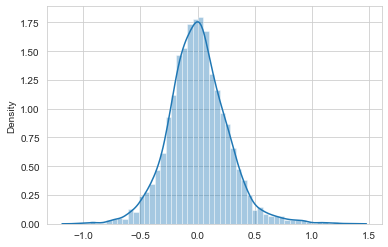

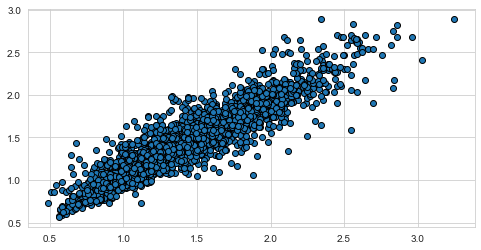

y_pred mean: 1.4244101761252446
KNN Regression RMSE: 0.15020133538621813, R2_score: 0.8595844285288304


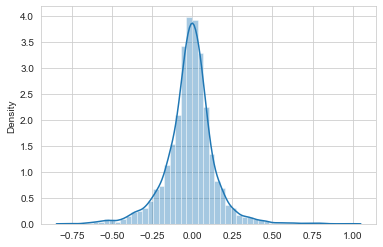

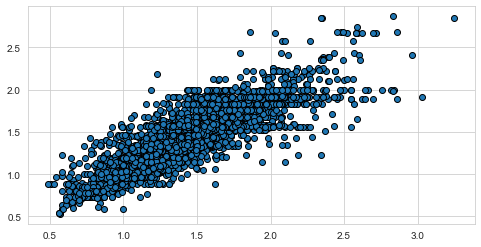

y_pred mean: 1.4114726978165126
Decision Tree RMSE: 0.2049177227744156, R2_score: 0.7386474594865168


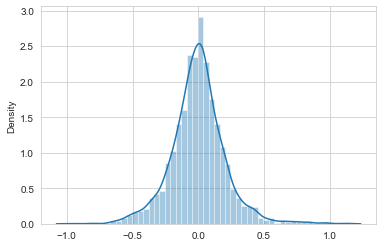

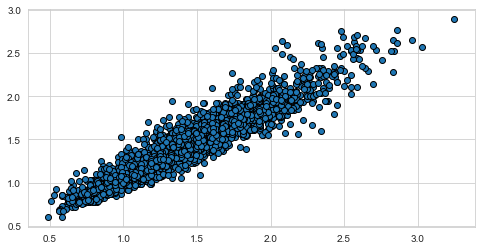

y_pred mean: 1.4165085602132501
AdaBoost Regression RMSE: 0.1352457520084197, R2_score: 0.886154740796306


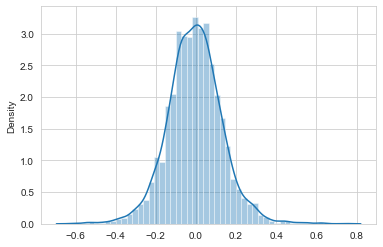

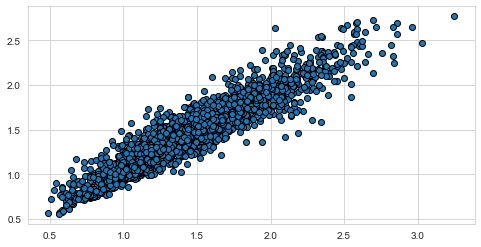

y_pred mean: 1.4164827866177963
RandomForest RMSE: 0.12692285250014168, R2_score: 0.899735467744475


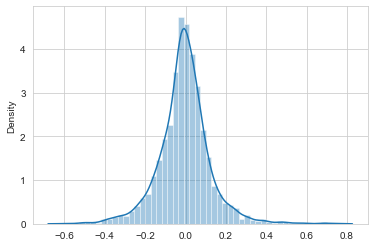

In [119]:
#Fitting regression classifiers with the Pipelines
mod_dict = {0: 'Logistic Regression',1: 'KNN Regression',2: 'Decision Tree',3: 'AdaBoost Regression',4: 'RandomForest'}

for m,pipe in enumerate(pipelines):
    pipe.fit(X_train, y_train)
    y_pred=(pipe.predict(X_test))
    
    #graph shows correlation between x=y_test and y=y_pred
    plt.figure(figsize=(8,4))
    plt.scatter(x=y_test, y=y_pred, edgecolors='black')
    plt.show()
    
    sns.distplot((y_test-y_pred),bins=50)

    print('y_pred mean:',y_pred.mean())
    print("{} RMSE: {}, R2_score: {}".format(mod_dict[m], np.sqrt(mean_squared_error(y_test, y_pred)),
                                             r2_score(y_test,y_pred)))

Confusion_matrix for RandomForest Regression:\
    \
The confusion_matrix is used to tell you how many predictions were classified correctly or incorrectly.
This is regression model, which gives a continous output (not classification).
So when you run confusion_matrix(y_test, y_pred) it will throw the ValueError because it expected class predictions,
not floating point numbers.\
If you want to predict e.g. 1 or 0 for your y values,
then you would have to convert your random forest regression predictions to either of these classes.\
You could say any value in y_pred above 1.414 is a 1 and anything below is 0.

In [120]:
thresh = 1.417                              # decide on a threshold limit
y_prediction_classes = np.zeros_like(y_pred)    # initialise a matrix full with zeros with shape and shape as y_pred
y_prediction_classes[y_pred > thresh] = 1       # add a 1 if the threshold was breached

In [121]:
#thresh = 1.417                              # decide on a threshold limit
y_test_classes = np.zeros_like(y_test)    # initialise a matrix full with zeros with shape and shape as y_test
y_test_classes[y_test > thresh] = 1       # add a 1 if the threshold was breached

In [122]:
from sklearn.metrics import confusion_matrix
cm_rf=confusion_matrix(y_test_classes, y_prediction_classes)

In [123]:
print(cm_rf)   #Accuracy = (TP + TN)/(TP+FP+TN+FN) = 0.8779

[[1749  184]
 [ 138 1579]]


In [124]:
#F1 Score= 2 * Precision*Recall/(Precision + Recall)
print('F1 score for RandomForest Regression:',f1_score(y_test_classes,y_prediction_classes))

F1 score for RandomForest Regression: 0.9074712643678162


-To summarise the differences between the F1-score and the accuracy,
Accuracy is used when the True Positives and True negatives are more important
while F1-score is used when the False Negatives and False Positives are crucial.

-Accuracy can be used when the class distribution is similar
while F1-score is a better metric when there are imbalanced classes. 
In our case, target is not imbalanced and Accuracy is close to F1-score.

-In most real-life classification problems, imbalanced class distribution exists 
and thus F1-score is a better metric to evaluate our model on.


In [125]:
data = pd.DataFrame({'Y Test':y_test , 'Y Pred':y_pred},columns=['Y Test','Y Pred'])
#sns.lmplot(x='Y Test',y='Y Pred',data=data,palette='rainbow')
data.head(10)


,Y Test,Y Pred
0,0.82,0.988809
1,0.97,0.984784
2,1.44,1.402307
3,0.97,0.907391
4,1.45,1.446835
5,1.29,1.385899
6,2.03,1.968104
7,0.94,0.924689
8,2.45,2.448694
9,1.83,1.831071


### Gradient Boosting model 

In [126]:
gradient_reg = GradientBoostingRegressor(max_depth=10, n_estimators=150, learning_rate=0.1,
                                         min_samples_split=4,min_samples_leaf=2)

In [127]:
gb_model = gradient_reg.fit(X_train, y_train)

In [128]:
y_gb_pred = gb_model.predict(X_test)

In [129]:
rs = np.sqrt(mean_squared_error(y_test, y_gb_pred))
print("RMSE: %f" %(rs))
print('R2_score: ', r2_score(y_test,y_gb_pred))

RMSE: 0.115629
R2_score:  0.9167849336576598


Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]\
where:\
R2: The R2 of the model\
n: The number of observations\
k: The number of predictor variables

In [130]:
adj_r2_score = 1 - (1-gb_model.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [131]:
print('GB Adjusted r2_score:', adj_r2_score)

GB Adjusted r2_score: 0.9152993648303488


In [132]:
# difference between actual and prediction data
data = pd.DataFrame({'Y Test':y_test , 'Y Pred':y_gb_pred},columns=['Y Test','Y Pred'])
#sns.lmplot(x='Y Test',y='Y Pred',data=data,palette='rainbow')
data.head()

,Y Test,Y Pred
0,0.82,0.954297
1,0.97,0.962947
2,1.44,1.346011
3,0.97,0.917676
4,1.45,1.439206


<AxesSubplot:ylabel='Density'>

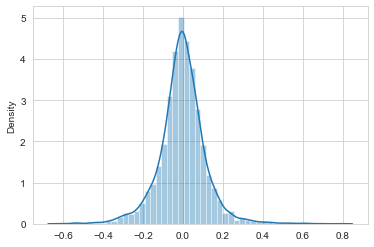

In [133]:
sns.distplot((y_test-y_gb_pred),bins=50)

In [134]:
# Difference between predicted and observed points looks to be normally distributed which is good 
#and GB model was a correct choice for the data.

In [135]:
# Tuning hyperparameters for GradientBoostRegressor:
# learning_rate-with a change in learning rate,n_estimators should also be adjusted 
#              (10-fold decrease in learning_rate should go in line with a approx. 10-fold increase in n_estimators).
# n_estimators
# max_depth
# min_samples_split - sets the minimum number of samples to split


# Caution! It takes lot of time to finish! So the code is commented out.
from sklearn.model_selection import GridSearchCV

LR = {'learning_rate':[0.01,0.1,0.15,1.0], 'n_estimators':[30,60,100,150,300], 'min_samples_split':[1,2,3,4],
      'min_samples_leaf':[1,2],'max_depth':[2,3,4,5,6,8,10]}

#tuning = GridSearchCV(estimator=GradientBoostingRegressor(),param_grid=LR, scoring='r2', n_jobs=-1)
#tuning.fit(X_train,y_train)
#tuning.best_params_, tuning.best_score_

({'learning_rate': 0.1,
  'max_depth': 8,
  'min_samples_leaf': 2,
  'min_samples_split': 3,
  'n_estimators': 300},
 0.9168521407695103)

### XGBoost Model

In [137]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=1, learning_rate=0.1,
                             max_depth=10, n_estimators=100, eta=0.01, gamma=0.01)

In [138]:
xgb_reg.fit(X_train, y_train)
preds = xgb_reg.predict(X_test)

In [139]:
print('XGB MAE:', mean_absolute_error(y_test, preds))
print('XGB MSE:', mean_squared_error(y_test, preds))
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("XGB RMSE: %f" %(rmse))
print('XGB R2_score: ', r2_score(y_test,preds))

XGB MAE: 0.08405399524153094
XGB MSE: 0.013587793421651301
XGB RMSE: 0.116567
XGB R2_score:  0.9154299437012174


Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]\
where:\
R2: The R2 of the model\
n: The number of observations\
k: The number of predictor variables

In [140]:
xgb_adj_r2_score = 1 - (1-xgb_reg.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [141]:
print('XGB Adjusted r2_score:', xgb_adj_r2_score)

XGB Adjusted r2_score: 0.9139201853739867


### k-fold Cross Validation using XGBoost

In [142]:
#feature_names=pd.DataFrame(X,columns=('TotalVolumeSold', 'small_Hass','TotalBags', 'year', 'month', 'Type'))

data_dmatrix = xgb.DMatrix(data=X_train,label=y_train) #training data matrix
data_dmatrix_test = xgb.DMatrix(data=X_test,label=y_test)

In [143]:
params = {"objective":"reg:squarederror",'learning_rate': 0.1, 'gamma': 0.01,
                'max_depth': 10, 'alpha': 10, 'eta': 0.01}

cv_res = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
               num_boost_round=150, early_stopping_rounds=7, metrics="rmse", as_pandas=True, seed=123)

In [144]:
cv_res

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.900928,0.002595,0.901008,0.005722
1,0.821004,0.002383,0.821121,0.005554
2,0.749721,0.002172,0.749931,0.005373
3,0.686022,0.001886,0.686580,0.005357
4,0.629483,0.001943,0.630118,0.004916
...,...,...,...,...
110,0.133178,0.002409,0.153454,0.000899
111,0.133145,0.002447,0.153410,0.000837
112,0.133089,0.002513,0.153355,0.000762
113,0.133042,0.002567,0.153326,0.000721


In [145]:
print(cv_res.tail(1))

     train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
114         0.132997         0.00262        0.153304       0.000691


Tuning hyperparameters that XGBoost provides

Details about some important parameters:
- colsample_bytree: corresponds to the fraction of features (the columns) to use.
 By default it is set to 1 meaning that we will use all features.
- max_depth: is the maximum number of nodes allowed from the root to the farthest leaf of a tree.
 Deeper trees can model more complex relationships by adding more nodes,
 but as we go deeper, it would cause the model to overfit.
- The ETA parameter controls the learning rate. It corresponds to the shrinkage of the weights associated
 to features after each round(it defines the amount of "correction" we make at each step).
 In practice, having a lower eta makes our model more robust to overfitting thus, usually, the lower the learning rate,
 the best. But with a lower eta, we need more boosting rounds, which takes more time to train,
 sometimes for only marginal improvements.
- regularization parameters:\
    gamma: controls whether a given node will split based on the expected reduction in loss after the split. A higer value leads to fewer splits.\
    alpha: L1 regularization on leaf weights. A large value leads to more regularization.

In [146]:
# Caution! It takes lot of time to finish! So the code is commented out.
from sklearn.model_selection import GridSearchCV

lr = {'learning_rate':[0.01,0.15,0.1,0.2,0.3], 'max_depth':[3,4,5,6,8,10,12,15], 'eta':[0.01,0.05,0.1,0.3,0.5],
      'colsample_bytree':[0.1,0.3,0.5,0.7,1.0], 'gamma':[0.05,0.01,0.1,0.2,0.3]}

#tuning_xgb = GridSearchCV(estimator=xgb.XGBRegressor(),param_grid=lr, scoring='r2', n_jobs=-1)
#tuning_xgb.fit(X_train,y_train)
#tuning_xgb.best_params_, tuning_xgb.best_score_

({'colsample_bytree': 0.7,
  'eta': 0.01,
  'gamma': 0.01,
  'learning_rate': 0.1,
  'max_depth': 12},
 0.9162498139993078)

Visualize Boosting Trees and Feature Importance

In [149]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=5)

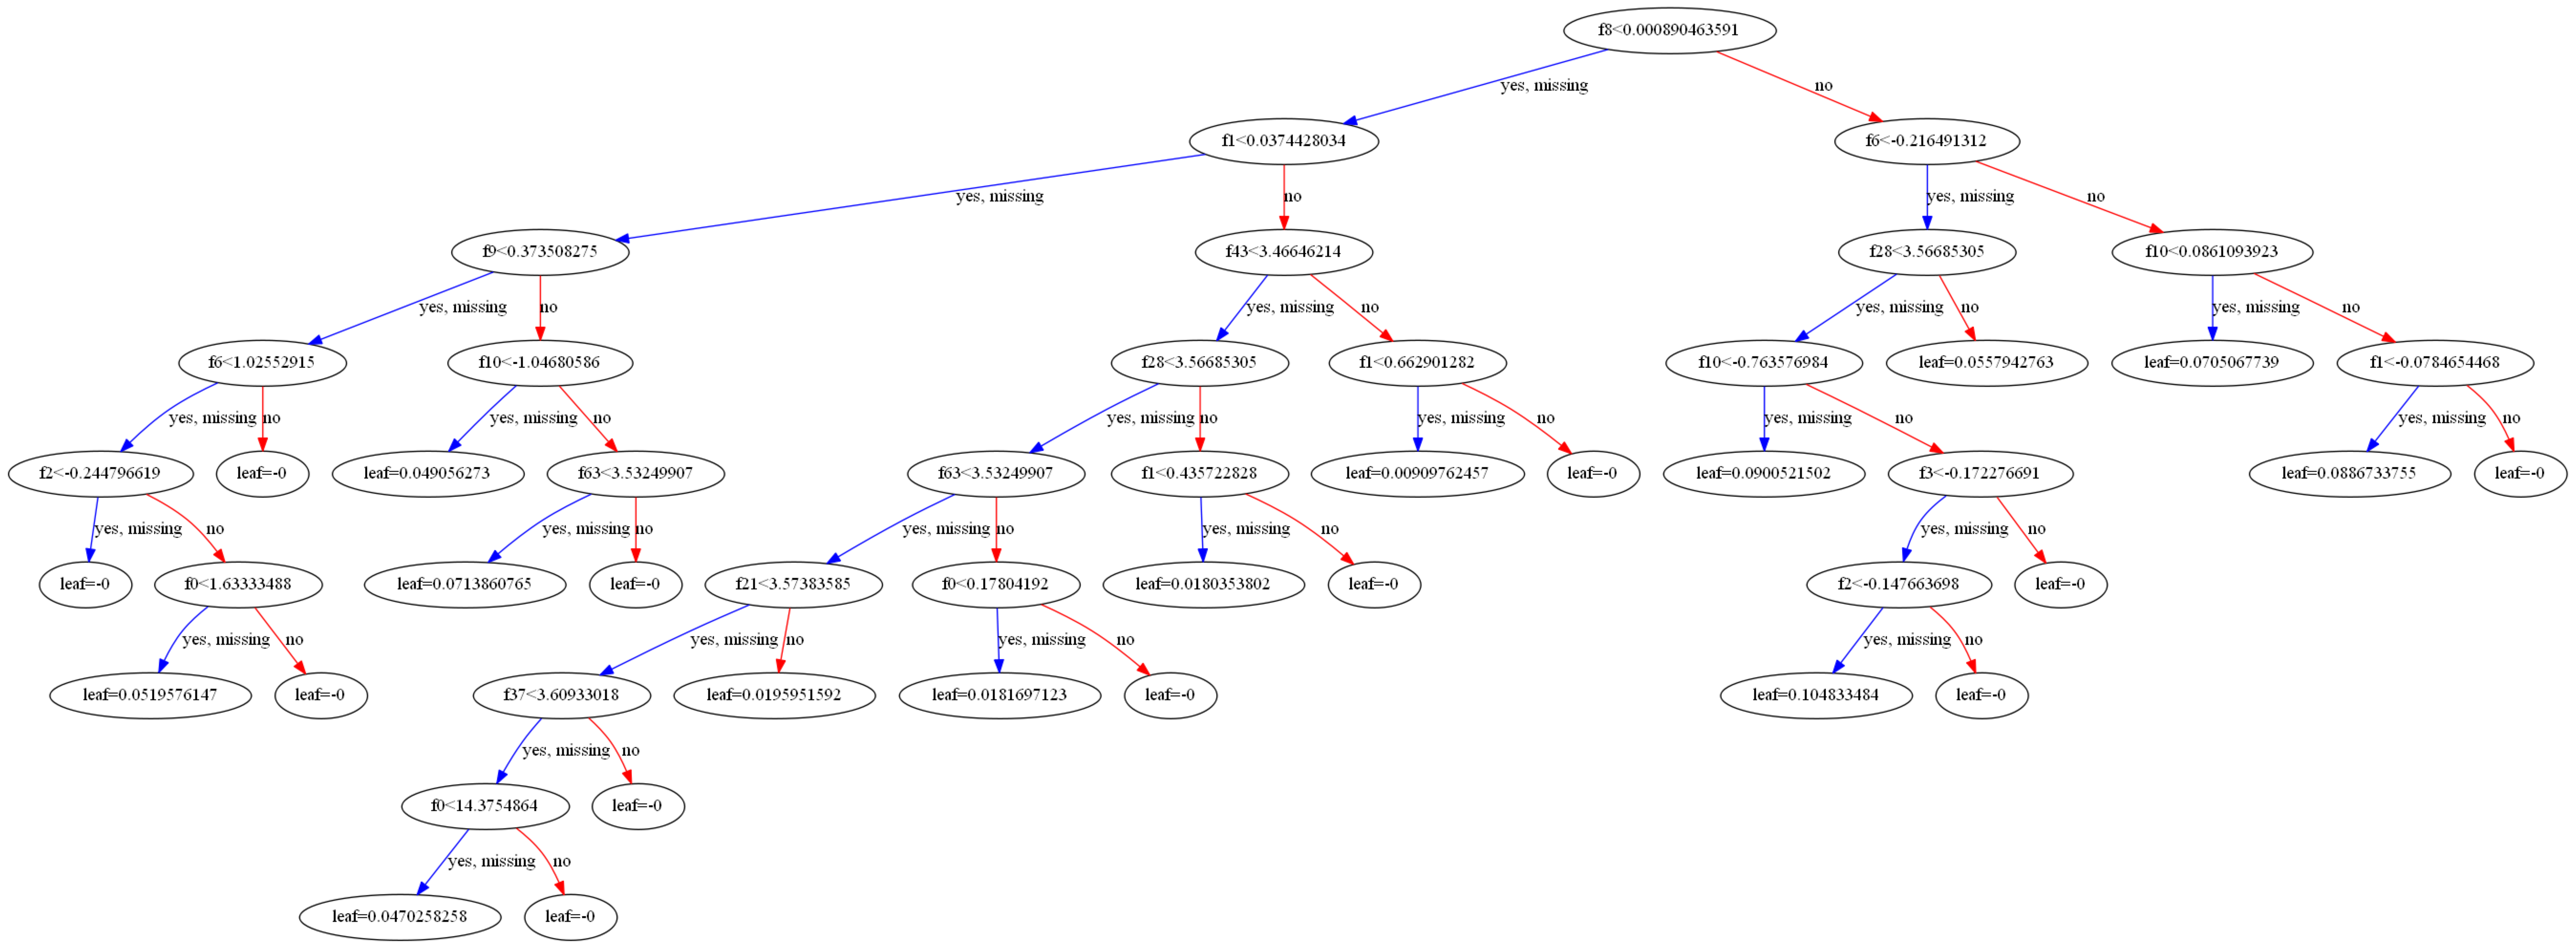

In [150]:
import matplotlib

xgb.plot_tree(xg_reg, num_trees=2)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(100,80)


### Conclusion:
Gradient Boost, XGBoost  and Random Forest algorithms have shown best results.

In [152]:
#THE END